In [1]:
from lalegpl.datasets.auto_weka import fetch_car
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from lalegpl.lib.weka import J48
from lalegpl.lib.r import ArulesCBAClassifier
from lale.lib.lale import Hyperopt
from lale.lib.sklearn import LogisticRegression, KNeighborsClassifier

In [2]:
(X_train, y_train), (X_test, y_test) = fetch_car()
y_name = y_train.name
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = pd.Series(y_train, name=y_name)
y_test = pd.Series(y_test, name=y_name)

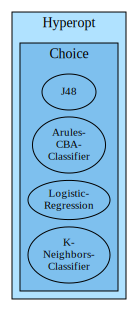

In [3]:
planned_pipeline = J48 | ArulesCBAClassifier | LogisticRegression | KNeighborsClassifier
optimizer = Hyperopt(estimator=planned_pipeline, cv=3, max_evals=10)
optimizer.visualize()

In [4]:
%%time
best_pipeline = optimizer.fit(X_train, y_train).get_pipeline()

100%|███████| 10/10 [00:30<00:00,  3.01s/trial, best loss: -0.7397714337190543]
CPU times: user 27 s, sys: 1.08 s, total: 28 s
Wall time: 33.2 s


In [5]:
print(accuracy_score(y_test, best_pipeline.predict(X_test)))
best_pipeline.pretty_print(show_imports=False, ipython_display=True)

0.806949806949807


```python
pipeline = ArulesCBAClassifier(confidence=0.17187156139656068)
```